<a href="https://colab.research.google.com/github/Hoonigan98/turbo-octo-invention/blob/master/MobileWt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/Deep Learning"

In [6]:
# 2.2 Full file path:
path = Path(pathToFolder) / "mobile_price.csv"

In [7]:
# 3.0 Read data
mobile_price = pd.read_csv(path)

In [8]:
# 3.1
mobile_price.shape
mobile_price.dtypes

(2000, 21)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
# 3.2 Get target and predictors:
y = mobile_price.pop("mobile_wt")
X = mobile_price

In [10]:
# 4.0 Build model:

model = tf.keras.Sequential()

In [11]:
# 4.1
model.add(layers.Input( shape = (20,) ) )

In [12]:
#4.1.2
model.add(layers.Dense(11,activation="sigmoid"))

In [13]:
#4.1.3
model.add(layers.Dense(770,activation="selu"))

In [14]:
# activation
model.add(layers.Dense(770,activation="relu"))

In [15]:
# 4.2
model.add(layers.Dense(1))

In [16]:
#4.3 Compile
model.compile( loss = "mae")

In [17]:
# 4.4 Train
model.fit(X,y, epochs = 500 )

Epoch 1/500
63/63 [==============================] - 2s 12ms/step - loss: 43.5332
Epoch 2/500
63/63 [==============================] - 1s 12ms/step - loss: 31.6575
Epoch 3/500
63/63 [==============================] - 1s 11ms/step - loss: 31.1786
Epoch 4/500
63/63 [==============================] - 1s 12ms/step - loss: 31.1492
Epoch 5/500
63/63 [==============================] - 1s 12ms/step - loss: 31.1321
Epoch 6/500
63/63 [==============================] - 1s 12ms/step - loss: 31.2917
Epoch 7/500
63/63 [==============================] - 1s 16ms/step - loss: 31.0494
Epoch 8/500
63/63 [==============================] - 1s 19ms/step - loss: 31.1103
Epoch 9/500
63/63 [==============================] - 1s 19ms/step - loss: 31.1047
Epoch 10/500
63/63 [==============================] - 1s 18ms/step - loss: 31.2464
Epoch 11/500
63/63 [==============================] - 1s 14ms/step - loss: 31.2521
Epoch 12/500
63/63 [==============================] - 1s 12ms/step - loss: 31.0425
Epoch 13/500


In [18]:
from tensorflow.keras.utils import plot_model

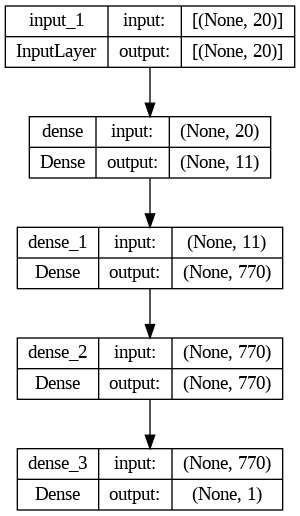

In [19]:
plot_model(model,show_shapes=True)

In [20]:
# 5.0 Predict
pred = model.predict(X)

63/63 [==============================] - 0s 3ms/step


In [21]:
# 5.1 Round up decimal places
pred = np.round(pred)


In [22]:
# 5.1.1
y.shape

(2000,)

In [23]:
# 5.2 Compare:
np.sum(pred == y.values.reshape(2000,1))/2000

0.0095